[Table of Contents](table_of_contents.ipynb)

# Topic 21:  The Matrix Exponential
Author: Thane Downing thanedowning@gmail.com

## Introduction 
The matrix exponential is a useful tool in solving systems of linear differential equations, helping to describe the behavior of linear systems, as well as having several other intersting uses.  The matrix exponential works much like the scalar exponential and has many of the same properties.  While perhaps initially unfamiliar, the matrix exponential developes readily from very familiar concepts and contributes to a straightforward understanding of how matrix math fits into a larger framework.

## Explanation of the theory
The eponential of any square matrix A can be writen as $e^A$, and can be understood in a similar way that we understand the scalar equivalent exponential $e^x$.  From calculus, we know that  $$\frac{d}{dx}e^x = xe^x$$  The same is true of the matrix exponential  $$\frac{d}{dx}e^A = Ae^A$$  The scalar exponential has the property  $(e^x)^{-1} = e^{-x}$  which follows directly from algebra.  The matrix exponential shares this property such that  $(e^A)^{-1} = e^{-A}$.  The Taylor series can be use to define $e^x$.  $$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots + \frac{n^2}{n!} + \ldots$$  The matrix exponential can also be defined this way.  $$e^A = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \ldots + \frac{A^2}{n!} + \ldots$$  In fact, this is the most general way to define the matrix exponential, and it works for any square matrix.  Therefore, in general we will define the matrix exponential as $$e^A = \sum_{n=0}^{\infty} \frac{1}{n!}A^n$$

One classic property of scalar exponentials that doesn't translate generally to matrix exponentials is the property  $$e^ae^b = e^{a+b}$$  For the matrix exponential case, in general  $$e^Ae^B \neq e^{A+B}$$  This is because $A$ and $B$ must be able to commute in order for these to be equal, i.e. $AB = BA$.  This can be seen using the definition given above; $e^Ae^B$ can only be rearranged into $e^{A+B}$ (by multiplying to instances of the Taylor series definition above) if, in the following product $(A+B)(A+B) = A^2 + AB + BA + B^2$, the sum of $AB + BA$ can be writen $2AB$ or $2BA$.  In general this is not the case, therefore in general $e^Ae^B \neq e^{A+B}$.

An expanded form to represent the matrix exponential, that only works for diagonalizable matrices, is given as $e^A = X e^{\Lambda} X^{-1}$, where $\Lambda$ is the diagonal matrix of the eigenvalues of $A$ and $X$ is an invertable matrix made up of the eigenvectors of $A$.  Taking this one step futher we can find that $$e^\Lambda = \begin{pmatrix}
    e^{\lambda_{1}} &   &   &   \\
      & e^{\lambda_{2}} &   &   \\
      &   & \ddots &   \\
      &   &   & e^{\lambda_{n}}
\end{pmatrix}$$  which makes computation quite straightforward.

The matrix exponential is handy in solving systems of linear differential equations, such as those encountered in continuous time state space equations.  Given some linear ordinary differential equation $\frac{dx}{dt} = ax$, we can determine that the solution is $x(t) = e^{at}$.  Now suppose we have a system of linear differential equations such that $\frac{d\textbf{x}}{dt} = A\textbf{x}$. The solution to this system is $\textbf{x}(t) = e^{At}\textbf{x}(0)$.  Using the expanded form given above, this solution can be rewriten $\textbf{x}(t) = e^{At}\textbf{x}(0) = Xe^{\Lambda t}X^{-1}\textbf{x}(0)$.  We can use the eigenvalues of A to determine the behavior of the solution similar to the way we can determine system dynamics in other settings.  The solution will decay if Re$(\lambda_i) < 0$, it will just oscillate if Re$(\lambda_i) = 0$ ($\lambda_i$ is purley imaginary), and it blow up if Re$(\lambda_i) > 0$, where $\lambda_i$ is the eigen value associated with a given eigenvector in the system.

Occasionally, this solution using the matrix exponential will be represented in terms of the Laplace transform as in $$e^{At} = \mathcal{L}^{-1}(sI - A)^{-1}$$  However, using the Neumann expansion $(sI - A)^{-1} = \frac{1}{s}(I + A/s + A^2/s^2 + \ldots)$, then taking the inverse Laplace transform produces the same Taylor series form of the matrix exponential as that given above.

In the context of continuous time LTI system defined by the state space equations $$\dot{\textbf{x}} = A\textbf{x}(t) + B\textbf{f}(t)\\
\textbf{y}(t) = C\textbf{x}(t)+D\textbf{f}(t)$$
the matrix exponential is used in the solution $$\textbf{x}(t) = e^{At}\textbf{x}(0) + \int_{0}^{t} e^{A(t-\lambda)}B\textbf{f}(t)d\lambda$$  If instead of starting at $t = 0$, we start at some arbitrary time $\tau$, then the solution to the state at $t$ will be of the form $$\textbf{x}(t) = e^{A(t-\tau)}\textbf{x}(\tau) + \int_{\tau}^{t} e^{A(t-\tau)}B\textbf{f}(t)d\lambda$$  The matrix $e^A(t-\tau)$ can be seen as a method of moving from some arbitrary state $\textbf{x}(\tau)$ to another $\textbf{x}(t)$, and is therefore sometimes refered to as the propagation matrix or the state-transition matrix denoted $\Phi(t,\tau)$.  This matrix has a couple interesting propeties: $$\Phi(t,t) = I\\ \frac{\partial \Phi(t,\tau)}{\partial t} = A \Phi(t,\tau)\\ \Phi(t,\tau) = (\Phi(\tau,t))^{-1}$$

Although there are contrived examples where the solution to the matrix exponential is nice and tidy, in general the solution will be rather complex.  For instance, the general solution to a $e^A$, where $A$ is a 2x2 matrix $$A = \begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}$$  is given by $$e^A = \frac{1}{\Delta}\begin{pmatrix}
    e^{\frac{a+d}{2}}(\Delta cosh(\frac{1}{2}\Delta)+(a-d)sinh(\frac{1}{2}\Delta)) & 2b e^{\frac{a+d}{2}}sinh(\frac{1}{2}\Delta)\\
    2c e^{\frac{a+d}{2}}sinh(\frac{1}{2}\Delta) & e^{\frac{a+d}{2}}(\Delta cosh(\frac{1}{2}\Delta)+(d-a)sinh(\frac{1}{2}\Delta))
\end{pmatrix}\\  \Delta = \sqrt{(a-d)^2+4bc}$$

## Simple Numerical Examples
There are several examples we can use to verify the results of the preceeding section.  First, we generate a random square matrix and use the matrix exonential function from the scipy.linalg library to calculate the matrix exponential.

In [1]:
import numpy as np
from scipy.linalg import expm
from math import factorial, sinh, cosh, exp, sqrt, cos, ceil
import random
import matplotlib.pyplot as plt

In [2]:
A = np.array([[random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()]])
print "A =\n", A
print "e^A =\n", expm(A)

A =
[[ 0.77322444  0.97817798  0.05130205  0.00289884]
 [ 0.62605327  0.54825988  0.42452292  0.47881342]
 [ 0.25544345  0.69134984  0.60499385  0.06443781]
 [ 0.46566462  0.50049095  0.54298316  0.27261443]]
e^A =
[[ 2.98683242  2.35734395  0.64045769  0.46933359]
 [ 1.83504175  3.03653723  1.2070289   0.9362243 ]
 [ 1.14472089  1.82462098  2.27663303  0.45031322]
 [ 1.46669057  1.7702765   1.23766603  1.65820432]]


Next, we can test our Taylor series expansion method (making sure to use enough iterations to get a good approximation) to verify that this approach will give us the same thing as the library function does. 

In [3]:
taylor_estimate = np.eye(4) + A
add = A
for i in range(2,200):
    add = np.matmul(add,A)/i
    taylor_estimate = taylor_estimate + add
print taylor_estimate

[[ 2.98683242  2.35734395  0.64045769  0.46933359]
 [ 1.83504175  3.03653723  1.2070289   0.9362243 ]
 [ 1.14472089  1.82462098  2.27663303  0.45031322]
 [ 1.46669057  1.7702765   1.23766603  1.65820432]]


We can also test the expanded form of the matrix exponential by using the scipy.linalg library to find the eigenvalues and eigenvectors of $A$ to verify that this method also produces what we expect to see.

In [4]:
lam, X = np.linalg.eig(A)
eigen_decomp = np.matmul(np.matmul(X,expm(np.diag(lam))),np.linalg.inv(X))
print eigen_decomp

[[ 2.98683242 -6.93889390e-18j  2.35734395 +2.15105711e-16j
   0.64045769 +0.00000000e+00j  0.46933359 -2.18575158e-16j]
 [ 1.83504175 -4.33680869e-19j  3.03653723 +4.43221848e-16j
   1.20702890 +0.00000000e+00j  0.93622430 -4.43763949e-16j]
 [ 1.14472089 -3.46944695e-18j  1.82462098 +7.14706072e-16j
   2.27663303 +0.00000000e+00j  0.45031322 -7.19042881e-16j]
 [ 1.46669057 +1.38777878e-17j  1.77027650 +5.27355937e-16j
   1.23766603 +0.00000000e+00j  1.65820432 -5.13478149e-16j]]


We can check the basic property $(e^A)^{-1} = e^{-A}$

In [5]:
print "e^-A =\n", expm(-A)
print "(e^A)^-1 =\n", np.linalg.inv(expm(A))

e^-A =
[[ 0.60133952 -0.59073574  0.0648053   0.14572971]
 [-0.28957874  0.87792162 -0.18663718 -0.36302965]
 [-0.03076115 -0.38076313  0.61964956  0.05540966]
 [-0.19977787 -0.13055079 -0.32056913  0.82037164]]
(e^A)^-1 =
[[ 0.60133952 -0.59073574  0.0648053   0.14572971]
 [-0.28957874  0.87792162 -0.18663718 -0.36302965]
 [-0.03076115 -0.38076313  0.61964956  0.05540966]
 [-0.19977787 -0.13055079 -0.32056913  0.82037164]]


A quick check will show that indeed, in general $e^Ae^B \neq e^{A+B}$

In [6]:
B = np.array([[random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()],
              [random.random(),random.random(),random.random(),random.random()]])
C = expm(A)*expm(B)
D = expm(A+B)
print "(e^A)*(e^B) =\n",C 
print "e^(A+B) =\n",D

(e^A)*(e^B) =
[[ 9.59371924  3.43674982  0.42793499  1.32786729]
 [ 4.19142566  6.05642977  0.71109896  2.24891473]
 [ 1.80307754  2.06928277  3.1573774   0.79232271]
 [ 3.29321455  2.58544428  0.90094525  6.46846994]]
e^(A+B) =
[[ 16.88500316  13.63632718   6.34528461  12.10913162]
 [ 15.52012408  13.70349108   6.58276513  11.99825847]
 [ 11.49089221  10.30846223   6.33251847   8.83327601]
 [ 15.02603589  12.93923831   6.89973776  13.06149922]]


We can even test the formula for computing a 2x2 matrix $\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}$ using the terms a, b, c, and d.

In [7]:
a = random.random()
b = random.random()
c = random.random()
d = random.random()

H = expm(np.array([[a,b],[c,d]]))
G = (1/sqrt((a-d)**2+4*b*c))*np.array([
    [exp((a+d)/2)*(sqrt((a-d)**2+4*b*c)*cosh(.5*sqrt((a-d)**2+4*b*c))+(a-d)*sinh(.5*sqrt((a-d)**2+4*b*c))),
     2*b*exp(((a+d)/2))*sinh(.5*sqrt((a-d)**2+4*b*c))],
    [2*c*exp(((a+d)/2))*sinh(.5*sqrt((a-d)**2+4*b*c)),
     exp(((a+d)/2))*(sqrt((a-d)**2+4*b*c)*cosh(.5*sqrt((a-d)**2+4*b*c))+(d-a)*sinh(.5*sqrt((a-d)**2+4*b*c)))]])
print "H =\n", H
print "G =\n", G

H =
[[ 1.70350322  0.81659774]
 [ 1.53120923  1.89609229]]
G =
[[ 1.70350322  0.81659774]
 [ 1.53120923  1.89609229]]


## Engineering Application 
One of the most applicable uses of the matrix exponential is in propagating the states of a system described by state space equations.  We can choose from thousands of examples of physical systems that have well defined state space representations to use as the basis for this exercise.  The following code is flexible enough to implement any LTI constant coefficient system.  Only the A, B, C, and D matrices need to be changed (along with the corresponding dimensions of u, x, and y).

The following example models an RLC circuit with two capacitors in parallel, where the input is an AC voltage source with an amplitude of five volts, the intermidiary states are the voltages over the two capcitors, and the output is the current through the first resistor, as shown in the picture below. ![RLC_Circuit](pictures/RLC_circuit.png)

In [8]:
c1 = 10*10**-6 # In Farads
c2 = 20*10**-6 # In Farads
r1 = 200 # In Ohms
r2 = 100 # In Ohms

A = np.array([[-1/(c1*r1)-1/(c1*r2),1/(c1*r2)],
              [1/(c2*r2),-1/(c2*r2)]])
B = np.array([[1/(c1*r1)],[0]])
C = np.array([[-1/r1,0]])
D = np.array([[1/r1]])

x_0 = np.array([[0],[4]])

t_step = 0.001
t_start = 0
t_end = 15

bins = int(ceil((t_end-t_start)/t_step))

u_vals = np.zeros((bins,1))
x_vals = np.zeros((bins,2))
y_vals = np.zeros((bins,1))


P = expm(A*t_step) # This is the propagation matrix

x_val = x_0

for i in range(bins):
    u_val = 5*cos(i*t_step)
    y_val = np.matmul(C,x_val)+D*u_val
    u_vals[i] = u_val
    x_vals[i,0] = x_val[0]
    x_vals[i,1] = x_val[1]
    y_vals[i] = y_val
    x_val = np.matmul(P,x_val)+np.matmul(P,B)*u_val*t_step 

In the following plots, the red line shows the voltage of the input signal u(t) (AC voltage source), the blue and black dashed lines show the voltage on capacitors 1 and 2 respectively, and the green line shows the current through resistor 1 in amps.  The x axis is the number of time samples.

<function matplotlib.pyplot.show>

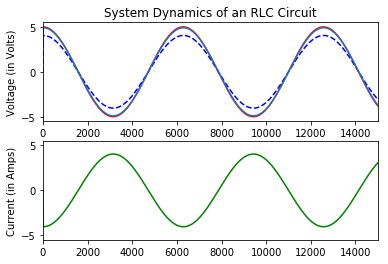

In [9]:
plt.figure(1)
plt.title("System Dynamics of an RLC Circuit")

plt.subplot(211)
plt.plot(u_vals, 'r-', x_vals[:,0], 'b--', x_vals[:,1])
plt.title("System Dynamics of an RLC Circuit")
plt.ylabel('Voltage (in Volts)')
plt.axis([0, 15000, -5.5, 5.5])

plt.subplot(212)
plt.plot( y_vals, 'g-')
plt.ylabel('Current (in Amps)')
plt.axis([0, 15000, -5.5, 5.5])

plt.show

#### Sources
Mathmematical Methods and Algorithms for Signal Processing by Todd K. Moon and Wynn C. Stirling

http://mathworld.wolfram.com/MatrixExponential.html

http://web.mit.edu/18.06/www/Spring17/Matrix-Exponentials.pdf

http://web.mit.edu/16.unified/www/FALL/signalssystems/Lecture11_12.pdf